In [7]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import scipy

In [6]:
import matplotlib.pyplot as plt

In [4]:
import statsmodels.api as sm

In [5]:
import statsmodels.formula.api as smf

In [8]:
df = pd.read_csv('data.csv')

In [10]:
print(df)

      economy    time  Renewable energy consumption  \
0         ABW  YR1970                           NaN   
1         ABW  YR1971                           NaN   
2         ABW  YR1972                           NaN   
3         ABW  YR1973                           NaN   
4         ABW  YR1974                           NaN   
...       ...     ...                           ...   
12933     ZWE  YR2015                     81.427200   
12934     ZWE  YR2016                     82.792603   
12935     ZWE  YR2017                     83.492996   
12936     ZWE  YR2018                     81.363602   
12937     ZWE  YR2019                           NaN   

       Fossil fuel energy consumption  CO2 intensity  \
0                                 NaN            NaN   
1                                 NaN            NaN   
2                                 NaN            NaN   
3                                 NaN            NaN   
4                                 NaN            NaN   
...

<AxesSubplot:xlabel='CO2 emissions (metric tons per capita)', ylabel='GDP per capita (current US$)'>

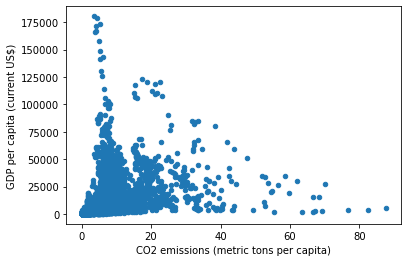

In [11]:
df.plot.scatter('CO2 emissions (metric tons per capita)', 'GDP per capita (current US$)')

In [18]:
print(df['CO2 emissions (metric tons per capita)'])

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
12933    0.897598
12934    0.783303
12935    0.718570
12936    0.849793
12937         NaN
Name: CO2 emissions (metric tons per capita), Length: 12938, dtype: float64


In [19]:
print(df['GDP per capita (current US$)'])

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
12933    1445.069702
12934    1464.588957
12935    1235.189032
12936    1254.642265
12937    1316.740657
Name: GDP per capita (current US$), Length: 12938, dtype: float64


In [17]:
X = df['CO2 emissions (metric tons per capita)']
Y = df['GDP per capita (current US$)']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

MissingDataError: exog contains inf or nans